<a href="https://colab.research.google.com/github/alexanderbonilla/UniAndes/blob/master/Best_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pylab as pl

from sklearn import linear_model

In [82]:
# Aqui creamos nuestro conjunto de datos, el cual es solo una línea recta con algun ruido gaussiano
xmin, xmax = -5, 5
n_samples = 100
X = [[i] for i in np.linspace(xmin, xmax, n_samples)]
Y = 2 + 0.5 * np.linspace(xmin, xmax, n_samples) \
      + np.random.randn(n_samples, 1).ravel()

In [83]:
# ejecuta el clasificador
clf = linear_model.LinearRegression()
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

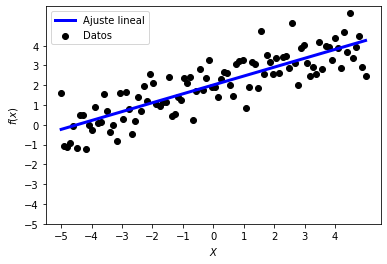

In [84]:
# plotea los resultados
pl.scatter(X, Y, color='black',label='Datos')
pl.plot(X, clf.predict(X), color='blue', linewidth=3, label='Ajuste lineal')
pl.xticks(np.arange(xmin, xmax, step=1))
pl.yticks(np.arange(xmin, xmax, step=1))
pl.xlabel('$X$')
pl.ylabel('$f(x)$')
pl.legend(loc='upper left')
pl.show()

In [85]:
print('b0 = ' + str(clf.coef_) + ', b1 = ' + str(clf.intercept_))

b0 = [0.44910973], b1 = 2.0173293955787495


In [62]:
import numpy as np
from numpy import diff, savetxt
from matplotlib import pyplot as plt
#from sklearn.gaussian_process import GaussianProcess
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.misc import derivative

In [65]:
dataH = np.loadtxt('/content/Hz_2016.txt')
z = dataH[:,0]
H = dataH[:,1]
sigmaH = dataH[:,2]

H0= 65.67725459647588 +/- 4.209492550319544


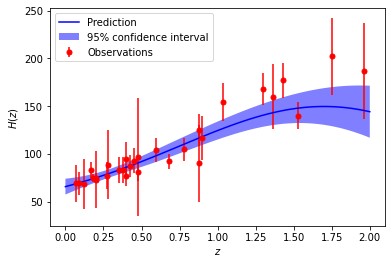

In [80]:
x = np.atleast_2d(np.linspace(0, 2, 100)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3))*RBF(10, (1e-2, 1e2))

X = z
X = np.atleast_2d(X).T

# Observations and noise
y = H
dy = sigmaH

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy**2,
                              n_restarts_optimizer=10).fit(X, y)

y_pred, sigma = gp.predict(x, return_std=True)
print('H0=',y_pred[0],'+/-',sigma[0])

plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600*sigma,
                        (y_pred + 1.9600*sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend(loc='upper left')
plt.show()


In [87]:
from IPython.display import YouTubeVideo


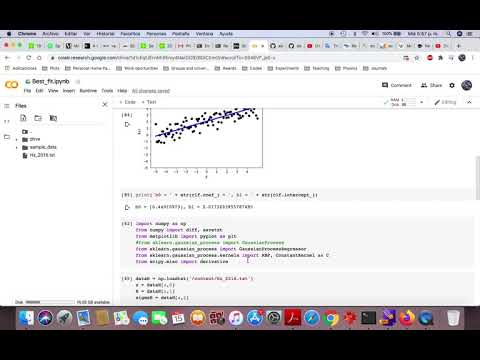

In [88]:
YouTubeVideo('km91oth7EsQ')